In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('heart.csv', encoding='utf-8')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#EDA
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

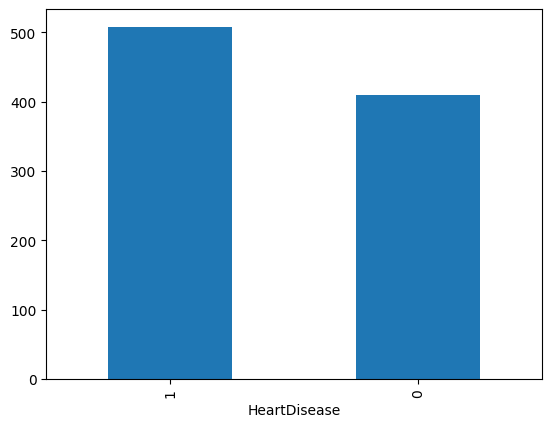

In [10]:
df['HeartDisease'].value_counts().plot(kind='bar')
plt.show()

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

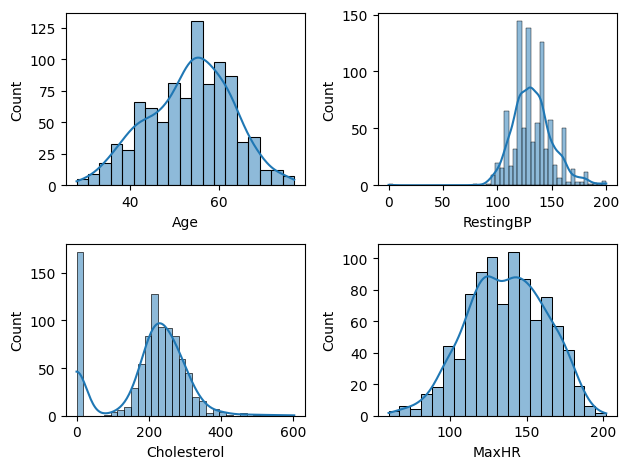

In [14]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)
    
plotting("Age",1)    
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)    

plt.tight_layout()

In [17]:
df['Cholesterol'].value_counts().sort_index()

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

In [19]:
ch_mean =  df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [22]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean, inplace=False)
df['Cholesterol'] = df['Cholesterol'].round(2)



In [23]:
restingBP_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0,restingBP_mean, inplace=False)
df['RestingBP'] = df['RestingBP'].round(2)

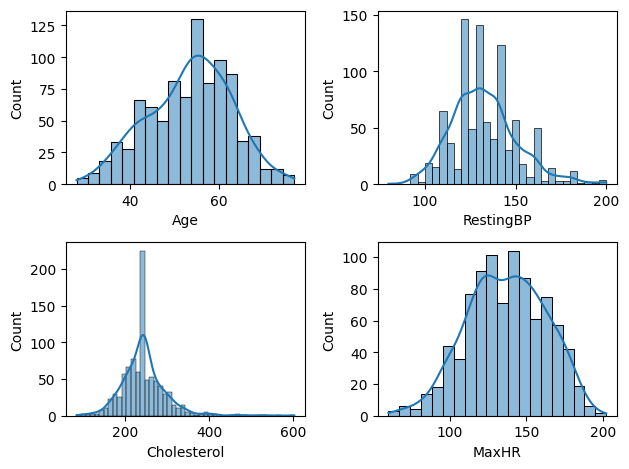

In [24]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)
    
plotting("Age",1)    
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)    

plt.tight_layout()

In [25]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

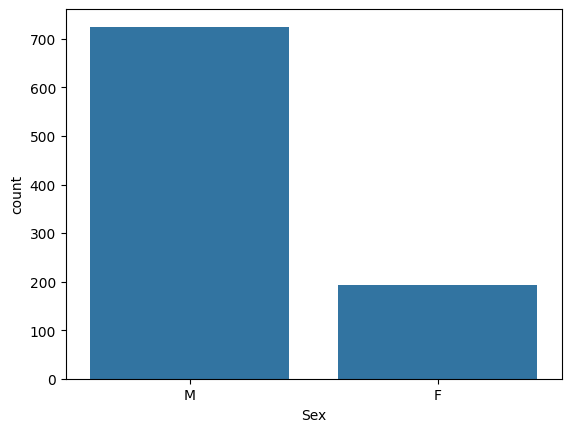

In [27]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

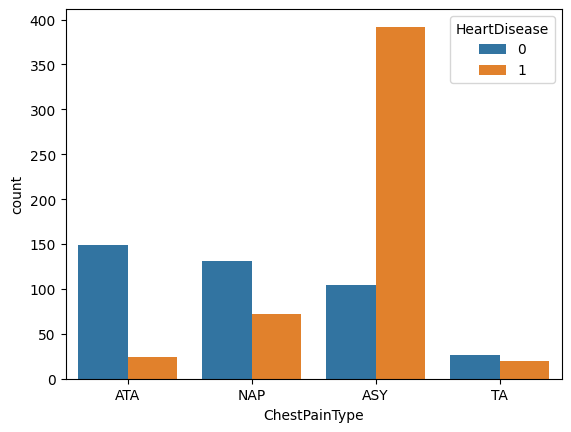

In [28]:
sns.countplot(x='ChestPainType', data=df, hue='HeartDisease')

<Axes: xlabel='HeartDisease', ylabel='count'>

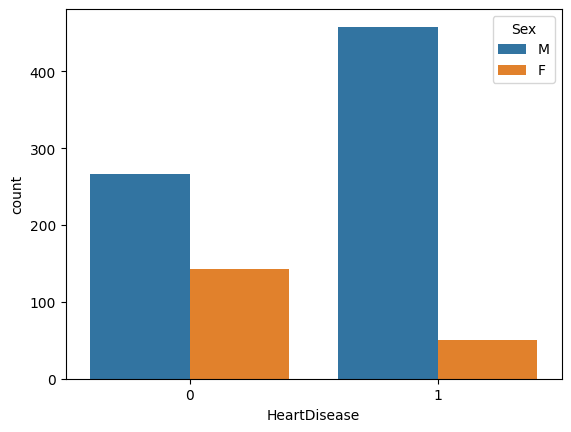

In [30]:
sns.countplot(x='HeartDisease', data=df, hue='Sex')

<Axes: xlabel='FastingBS', ylabel='count'>

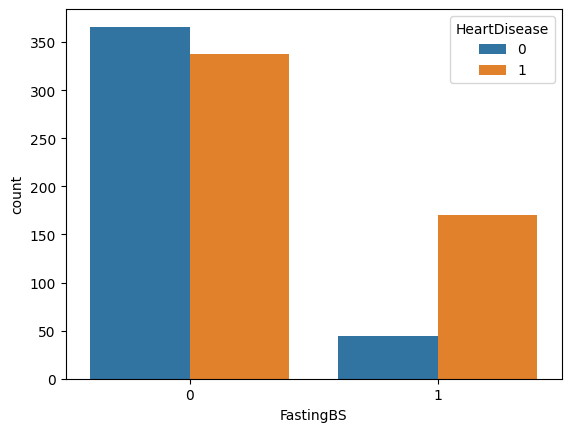

In [32]:
sns.countplot(x='FastingBS', data=df, hue='HeartDisease')

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

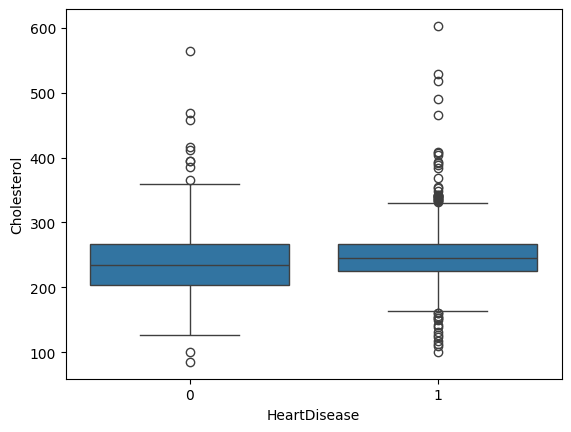

In [34]:
sns.boxplot(y='Cholesterol', x='HeartDisease', data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

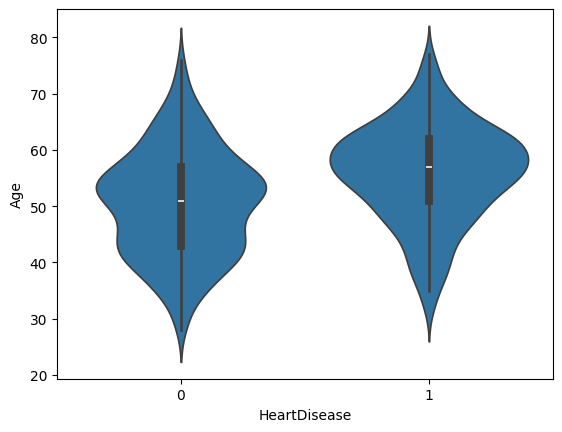

In [35]:
sns.violinplot(y='Age', x='HeartDisease', data=df)

<Axes: >

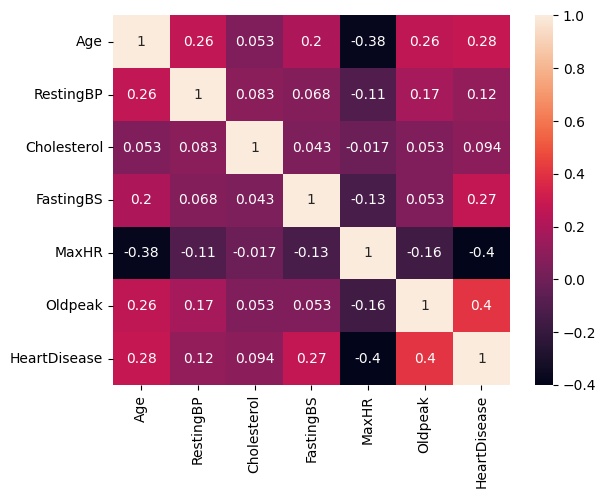

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [42]:
#Data preprocessing and cleaning
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.astype(int)

In [43]:
df_encoded.dtypes

Age                  int64
RestingBP            int64
Cholesterol          int64
FastingBS            int64
MaxHR                int64
Oldpeak              int64
HeartDisease         int64
Sex_M                int64
ChestPainType_ATA    int64
ChestPainType_NAP    int64
ChestPainType_TA     int64
RestingECG_Normal    int64
RestingECG_ST        int64
ExerciseAngina_Y     int64
ST_Slope_Flat        int64
ST_Slope_Up          int64
dtype: object

In [44]:
from sklearn.preprocessing import StandardScaler
numeric_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encoded[numeric_col] = scaler.fit_transform(df_encoded[numeric_col])
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1
